                                                    STOCK MARKET

Reading Data and Basic Stats

In [39]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import LocalOutlierFactor
from numpy import ma
import math
import ydata_profiling
from ydata_profiling import ProfileReport

import matplotlib
from matplotlib.pyplot import figure
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
%matplotlib inline
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.optimizers import Adam
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from scikeras.wrappers import KerasClassifier
import keras.backend as K

Reading Data and Basic Stats

In [8]:
# Importing dataset
df = pd.read_csv('stocks.csv')
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [9]:
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [12]:
df.shape

(248, 8)

In [13]:
df.describe

<bound method NDFrame.describe of     Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  6412

In [14]:
# Checking missing values
df.isnull().any()

Ticker       False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [15]:
# Checking missing values
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data Visualisation

In [16]:
# Drop non-numerical columns that don't make sense for correlation
numerical_data = df.drop(columns=['Ticker', 'Date'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999626  0.999650  0.999176   0.999173 -0.547741
High       0.999626  1.000000  0.999654  0.999644   0.999640 -0.546175
Low        0.999650  0.999654  1.000000  0.999663   0.999661 -0.544590
Close      0.999176  0.999644  0.999663  1.000000   0.999999 -0.544194
Adj Close  0.999173  0.999640  0.999661  0.999999   1.000000 -0.544370
Volume    -0.547741 -0.546175 -0.544590 -0.544194  -0.544370  1.000000


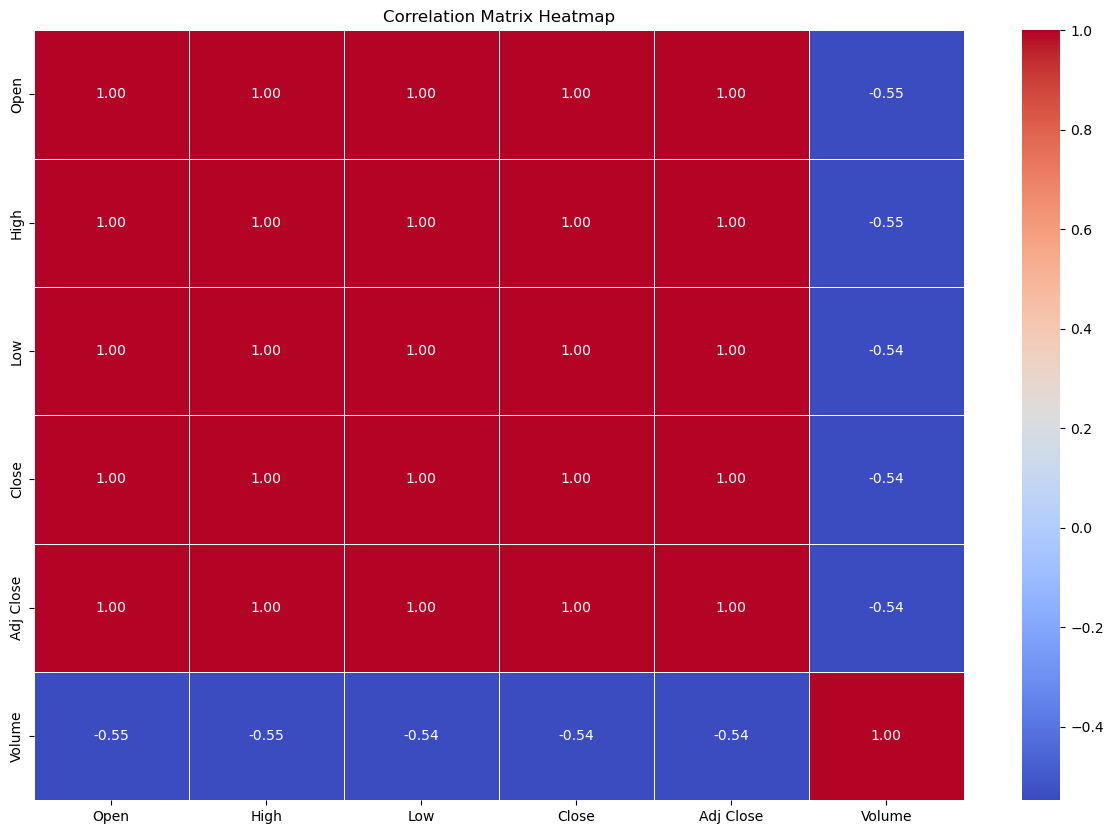

In [17]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

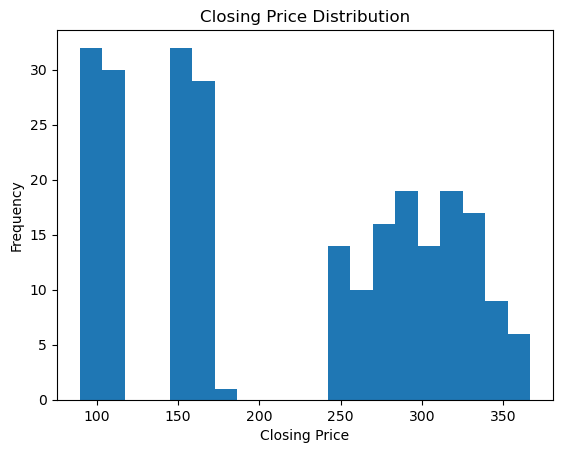

In [19]:
# The distribution of the closing prices to understand their range and frequency.
plt.hist(df['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

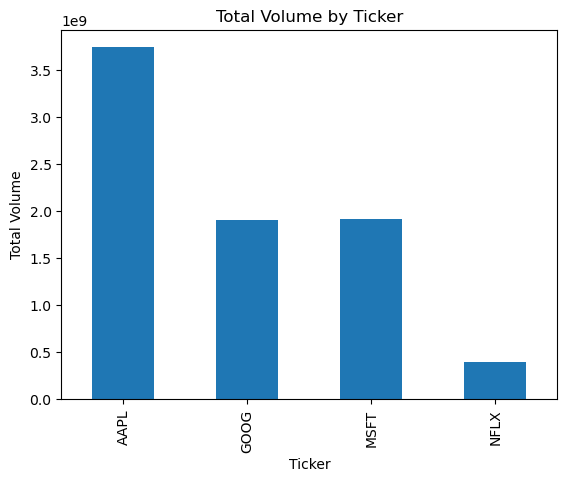

In [20]:
# The distribution of the ticker to understand their total volume and total volume by ticker.
ticker_volume = df.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')
plt.show()

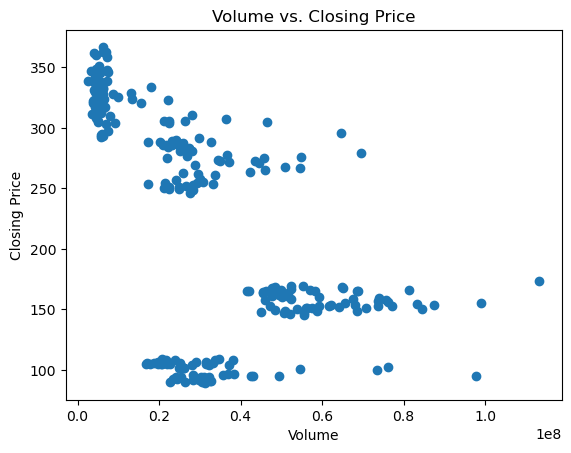

In [21]:
# Exploring the relationship between volume and closing prices, to identify any correlations.
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

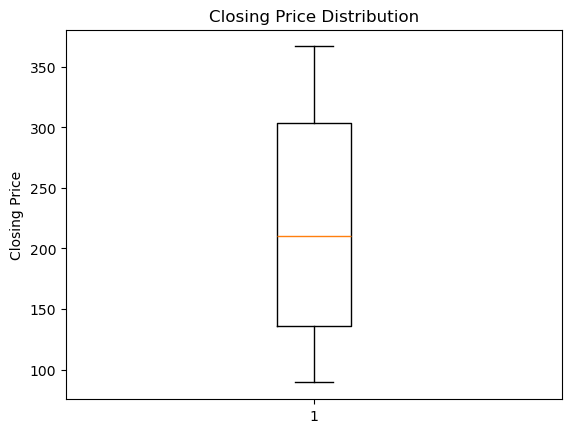

In [22]:
# Illustrating the distribution of the closing prices, including the median, quartiles, and outliers.
plt.boxplot(df['Close'])
plt.ylabel('Closing Price')
plt.title('Closing Price Distribution')
plt.show()

Regression Analysis

In [23]:
# Define your predictor(s) and target
X = df[['Volume']]  # Replace with your actual predictor columns
y = df['Close']  # Replace with your actual target variable

In [24]:
# Importing libararies
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [25]:
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# Add constant to both training and testing sets
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [27]:
# Fit model on training data
model = sm.OLS(y_train, X_train_const).fit()

In [28]:
# Predict on test set
y_pred = model.predict(X_test_const)

In [29]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6881.891049549379


In [30]:
# Evaluate predictions (e.g., using R²)
from sklearn.metrics import r2_score
print("Test R²:", r2_score(y_test, y_pred))

Test R²: 0.15647056834042683


In [31]:
model = sm.OLS(y, X).fit()

In [32]:
# Summary of regression
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.401
Method:                 Least Squares   F-statistic:                              166.9
Date:                Sat, 12 Jul 2025   Prob (F-statistic):                    1.64e-29
Time:                        23:29:08   Log-Likelihood:                         -1640.7
No. Observations:                 248   AIC:                                      3283.
Df Residuals:                     247   BIC:                                      3287.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

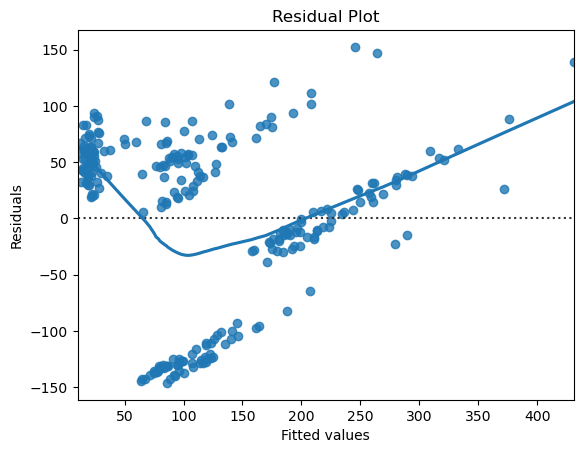

In [33]:
# Visualize residuals
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

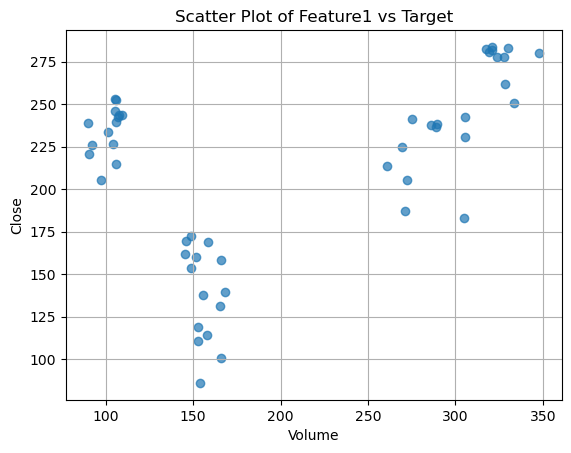

In [34]:
# Visualise Scatter plot
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Scatter Plot of Feature1 vs Target')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.grid(True)
plt.show()

Summary

In [40]:
# Generating summary report
profile= ProfileReport(df, title="Stock Market Analysis")

In [42]:
# Summary Report
profile